# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


MATRICOLA: 216701

In [116]:
import numpy as np
from skimage import io
import cv2
import os
from skimage import filters
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray
from _skdemo import *
import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [33]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

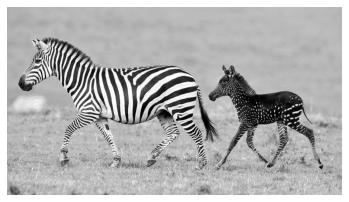

In [34]:
myimshow(zebra)

In [35]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

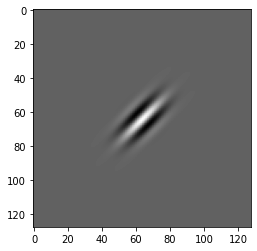

In [104]:
g = genGabor((128,128), 0.6, np.pi/4, func=np.cos) 
plt.imshow(g)

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

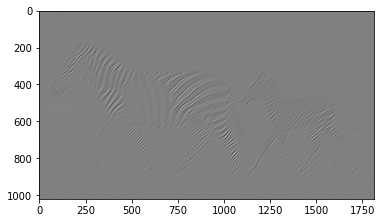

In [106]:
res = convolve2d(zebra, g) 
plt.imshow(res)

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

Il filtro più semplice che mi permetterebbe di individuare i contorni è quello di Sobel(filters.sobel).


# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

Image Loaded


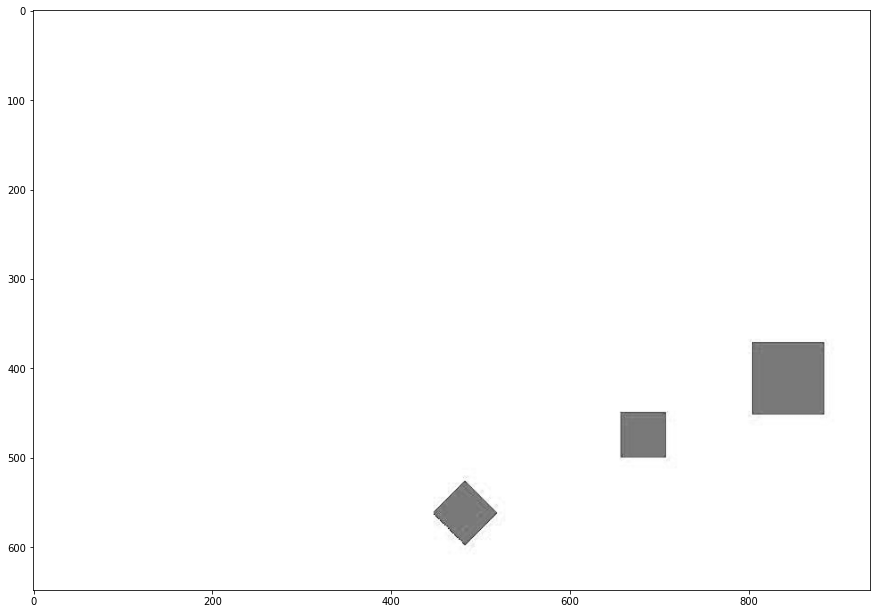

In [84]:
path='/Users/gaetanopalmieri/virtualenvs/Università/ESAME'
def myResourcePath(fname):
    filename = os.path.join(path, fname)
    if not os.path.exists(filename):
        raise RuntimeError(f'file not found {filename}')
    return filename

img2 = cv2.imread(myResourcePath('quadrati.jpg'), cv2.IMREAD_COLOR)
if img2 is None:
    print('Open Error')
else:
    print('Image Loaded')

fig = plt.figure(figsize=(15, 15))
plt.imshow(img2)
grayscale=cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(iniziale, cmap='gray')

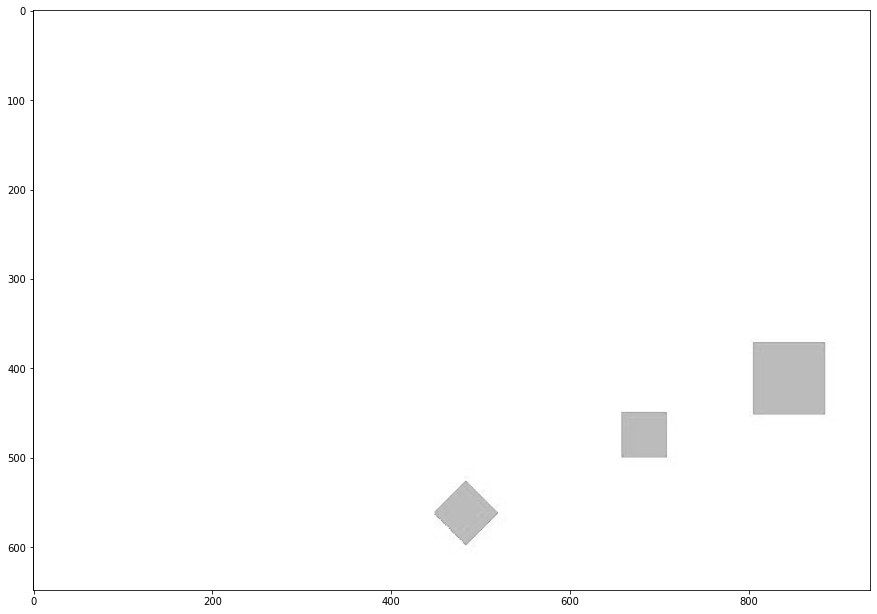

In [85]:
def convolve2d(image, kernel):
    
    kernel_height, kernel_width = kernel.shape
    
    a = kernel_width//2
    b = kernel_height//2
    
    
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2*a, image.shape[1] + 2*b))
    image_padded[a:-a, b:-b] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+kernel_width, x: x+kernel_height]).sum()

    return output


fig = plt.figure(figsize=(15, 15))
shift = np.array([
    [0,0,0],
    [0,0,1],
    [0,0,0]
])
out = convolve(grayscale,shift,mode='constant', cval=0.0)
plt.imshow(out)

L'immagine iniziale viene caricata tramite la libreria opencv. Dopodichè si effettua la conversione in scala di grigi. 
Poi si va ad applicare un FILTRO DI SHIFT.

# Esercizio 3

Spiegare e mostrare con un esempio numerico i vantaggi e gli svantaggi di applicare un filtro 5x5 oppure due filtri 5x1 e 1x5 in sequenza. 

Se si fa una singola operazione si evita la creazione di artefatti.
Più strati di applicazione portano a peggioare la qualità dell immagine.

# Esercizio 4

Eliminare il riempimento delle forme blu

![](forme.jpg)

Image Loaded
Blue detected!


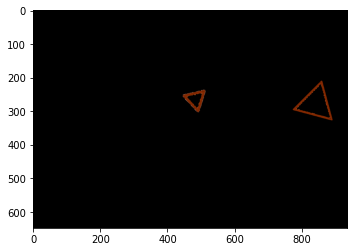

In [101]:
def detectShape(c):        
   shape = 'unknown' 
   peri=cv2.arcLength(cnt,True) 
   vertices = cv2.approxPolyDP(cnt, 0.02 * peri, True)
   sides = len(vertices) 
   if (sides == 3): 
        shape='triangle' 
   return shape 
  
    
img4= cv2.imread(myResourcePath('forme.jpg'), cv2.IMREAD_COLOR)

if img4 is None:
    print('Open Error')
else:
    print('Image Loaded')

    
gray = cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY) 
edged = cv2.Canny(gray, 170, 255)        
ret,thresh = cv2.threshold(gray,240,255,cv2.THRESH_BINARY)  
(contours,_) = cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
for cnt in contours:
    moment=cv2.moments(cnt) 
    cx = int(moment['m10'] / moment['m00']) 
    cy = int(moment['m01'] / moment['m00']) 
    shape=detectShape(cnt) 
    if shape== 'triangle':
        cv2.drawContours(img4,[cnt],-1,(0,255,0),2)
    plt.imshow(img4)
    
    
    
hsv = cv2.cvtColor(img4, cv2.COLOR_BGR2HSV)
lower_range = np.array([110,50,50])
upper_range = np.array([130,255,255])
mask = cv2.inRange(hsv, lower_range, upper_range)

hasBlue = np.sum(mask)
if hasBlue > 0:
    print('Blue detected!')

res = cv2.bitwise_and(img4,img4,mask=mask)
fin = np.hstack((img4,res))
plt.imshow(res)

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 45° in senso orario in (5, 5) e una traslazione di 50 px sull'asse x.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

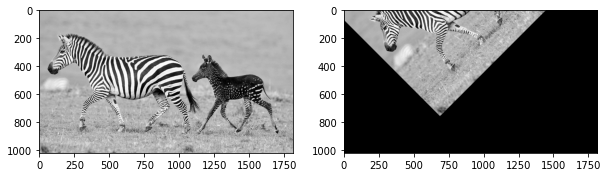

In [118]:
import os
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.transform import SimilarityTransform
from skimage import transform


img = cv2.imread(myResourcePath('zebra.jpg'), cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape
M = cv2.getRotationMatrix2D((5,5),45,1) # params: center, angle, scale
dst1 = cv2.warpAffine(img,M,(cols,rows))
tform = SimilarityTransform(translation=(50, 0), rotation=np.deg2rad(45))
warped = transform.warp(img, tform)
imshow_all(img, warped)